**INTRODUCTION**

 **RUNNING BASIC LIBRARIES**

In [1]:
#import libraries

#data wrangling and pre-processing
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**2.1. Undertanding The Dataset**

In [2]:
import pandas as pd 

ae = pd.read_csv('/kaggle/input/bip-ae-technical-challenge/training_set.csv')

In [3]:
ae.head()

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
0,7.0,18-24,2.0,2016-02-15T00:00:00Z,01-04,650,Low,2,2,1,1,8.0,15149,0,NaN,NaN,NaN,765388
1,7.0,1-17,2.0,2016-03-12T00:00:00Z,21-24,200,Low,1,1,1,2,1.0,15099,0,NaN,NaN,NaN,774977
2,2.0,45-64,2.0,2016-06-22T00:00:00Z,13-16,40,Low,1,1,4,2,1.0,15194,0,NaN,NaN,NaN,769250
3,1.0,85+,2.0,2015-04-14T00:00:00Z,17-20,110,Low,1,1,2,1,1.0,15260,1,IX,300,42.0,795829
4,3.0,18-24,1.0,2014-07-06T00:00:00Z,13-16,60,Low,1,2,2,2,2.0,15105,0,NaN,NaN,NaN,732712


**Exploratory Data Analysis**

Cleaning and Preprocessing

In [4]:
#Looking for variables Data type
ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   IMD_Decile_From_LSOA             99734 non-null   float64
 1   Age_Band                         100000 non-null  object 
 2   Sex                              99542 non-null   float64
 3   AE_Arrive_Date                   100000 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null   object 
 5   AE_Time_Mins                     100000 non-null  int64  
 6   AE_HRG                           98466 non-null   object 
 7   AE_Num_Diagnoses                 100000 non-null  int64  
 8   AE_Num_Investigations            100000 non-null  int64  
 9   AE_Num_Treatments                100000 non-null  int64  
 10  AE_Arrival_Mode                  100000 non-null  int64  
 11  Provider_Patient_Distance_Miles  99734 non-null   float64
 12  Pro

In [5]:
#Getting the shape of data
ae.shape


(100000, 18)

In [6]:
ae.isnull().values.any()

#checking missing values in dataset columnwise
ae.isna().sum()

IMD_Decile_From_LSOA                 266
Age_Band                               0
Sex                                  458
AE_Arrive_Date                         0
AE_Arrive_HourOfDay                  458
AE_Time_Mins                           0
AE_HRG                              1534
AE_Num_Diagnoses                       0
AE_Num_Investigations                  0
AE_Num_Treatments                      0
AE_Arrival_Mode                        0
Provider_Patient_Distance_Miles      266
ProvID                                 0
Admitted_Flag                          0
ICD10_Chapter_Code                 51218
Treatment_Function_Code            50381
Length_Of_Stay_Days                50377
Record_ID                              0
dtype: int64

In [7]:
# Convert all column names to lowercase
ae.columns = ae.columns.str.lower()
print(ae.columns)

Index(['imd_decile_from_lsoa', 'age_band', 'sex', 'ae_arrive_date',
       'ae_arrive_hourofday', 'ae_time_mins', 'ae_hrg', 'ae_num_diagnoses',
       'ae_num_investigations', 'ae_num_treatments', 'ae_arrival_mode',
       'provider_patient_distance_miles', 'provid', 'admitted_flag',
       'icd10_chapter_code', 'treatment_function_code', 'length_of_stay_days',
       'record_id'],
      dtype='object')


In [8]:
# finding the mode for ae_hrg and sex
print(ae['ae_hrg'].mode())

0    Low
Name: ae_hrg, dtype: object


In [9]:
#Dealing with the null values 
ae.dropna(subset=['imd_decile_from_lsoa', 'provider_patient_distance_miles'], inplace=True)
ae['icd10_chapter_code'].fillna('Unknown', inplace=True)
ae['sex'].fillna(3.0000, inplace=True) #3.0000 stands for unknown gender
ae['length_of_stay_days'].fillna(0, inplace=True)
ae['treatment_function_code'].fillna("Unknown", inplace=True)
ae['ae_hrg'].fillna("Low", inplace=True)
ae.dropna(subset=['ae_arrive_hourofday'], inplace=True)
print("Shape of cleaned DataFrame:", ae.shape)

Shape of cleaned DataFrame: (99542, 18)


In [10]:
 # calculating the sum of null values across all the columns
(ae.isnull().sum())

imd_decile_from_lsoa               0
age_band                           0
sex                                0
ae_arrive_date                     0
ae_arrive_hourofday                0
ae_time_mins                       0
ae_hrg                             0
ae_num_diagnoses                   0
ae_num_investigations              0
ae_num_treatments                  0
ae_arrival_mode                    0
provider_patient_distance_miles    0
provid                             0
admitted_flag                      0
icd10_chapter_code                 0
treatment_function_code            0
length_of_stay_days                0
record_id                          0
dtype: int64

In [11]:
# Convert 'Sex' column to integers
ae['sex'] = ae['sex'].astype(int)

# Convert 'Provider_Patient_Distance_Miles', 'length_of_stay_days', 'imd_decile_from_lsoa' columns to integers
ae['length_of_stay_days'] = ae['length_of_stay_days'].astype(int)
ae['provider_patient_distance_miles'] = ae['provider_patient_distance_miles'].astype(int)
ae['imd_decile_from_lsoa'] = ae['imd_decile_from_lsoa'].astype(int)
#ae['ae_arrive_hourofday'] = ae['ae_arrive_hourofday'].astype(int)

In [12]:
ae.shape

(99542, 18)

**DATA VISUALIZATION** - UNIVARIATE ANALYSIS

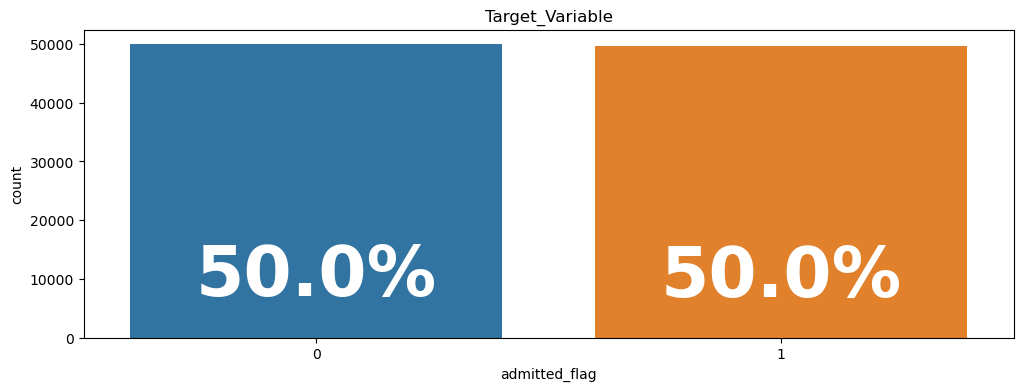

In [13]:
def visualize_ds(ae: pd.DataFrame, title: str) -> None:

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(data=ae, x='admitted_flag')
    ax.set_title(title)

    for i in ax.patches:

        ax.text(
            x=i.get_x() + i.get_width() / 2,
            y=i.get_y() + i.get_height() / 7,
            s=f"{np.round(i.get_height() / len(ae)* 100.)}%",
            ha="center",
            size=50,
            weight="bold",
            color="white"
        )

visualize_ds(ae, "Target_Variable")

Where

0 represents Admitted

1 represents Not Admitted



We can see that 50% of the total datasets are  admitted while the other 50% are not admmitted. We could also deduce from this chart that our data is balanced.

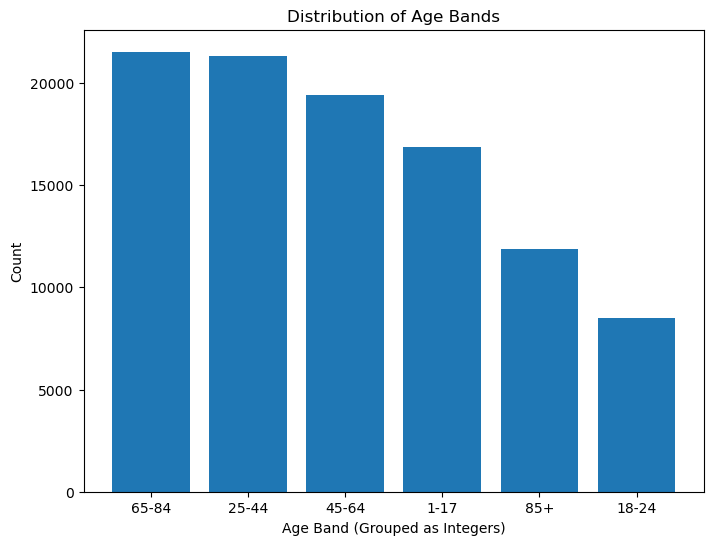

In [14]:
health_df = pd.DataFrame(ae)

# Calculate the count of each age band on-the-fly using value_counts()
age_band_counts = health_df['age_band'].value_counts()

# Plotting the age band distribution as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(age_band_counts.index, age_band_counts)
plt.xlabel('Age Band (Grouped as Integers)')
plt.ylabel('Count')
plt.title('Distribution of Age Bands')
plt.xticks(rotation=0)  # If age bands are represented by integer labels, no need to rotate x-axis labels

plt.show()

We can deduce from this chart that in the overall dataset the age group 25-44 and 65-84 are the most common in accident and emergency cases.

**Distribution of Gender**

Text(0.5, 1.0, 'Distribution of Gender')

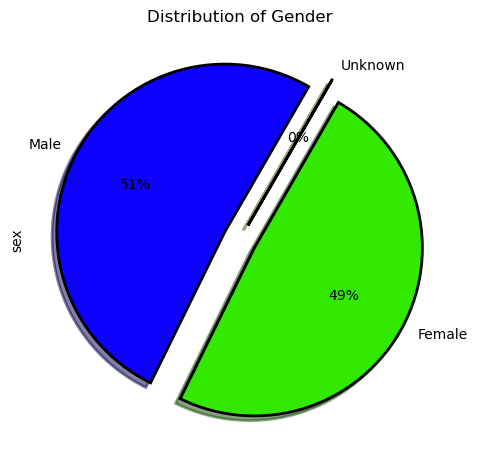

In [15]:
#checking gender distribution
#first check the overall distribution of age then gender

plt.figure(figsize=(18,12))
plt.subplot(221)
ae["sex"].value_counts().plot.pie(x=1, autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female", "Unknown"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1,.1],shadow =True)

plt.title("Distribution of Gender")


The chart above shows 51% of the overall dataset are male and the other 49% are females with an insigificant percentage being unknown

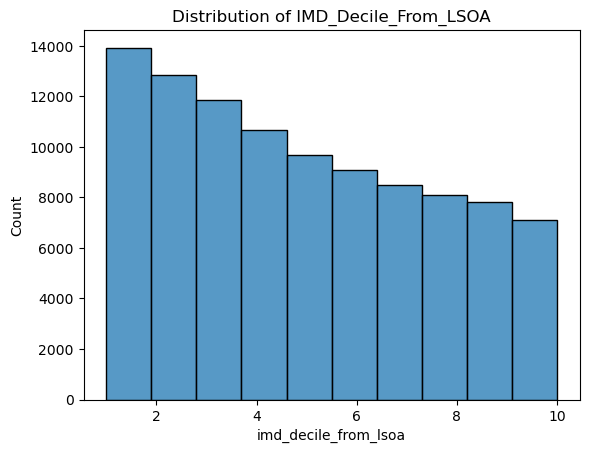

In [16]:
# Visualize the distribution of 'IMD_Decile_From_LSOA'
sns.histplot(x='imd_decile_from_lsoa', data=ae, bins=10)
plt.title('Distribution of IMD_Decile_From_LSOA')
plt.show()

This histogram displays the distribution of IMD deciles across Lower Layer Super Output Areas (LSOAs). Each bar in the histogram represents a range of IMD decile values.
From the shape of the histogram, we can observe the general pattern of IMD decile distribution among the areas. 
This histogram is skewed to the left, it suggests that a larger number of LSOAs have lower levels of deprivation. 

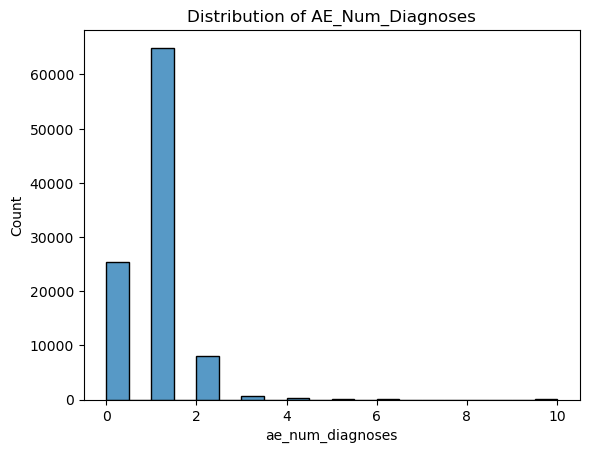

In [17]:
# Plot the distribution of 'AE_Num_Diagnoses'
sns.histplot(x='ae_num_diagnoses', data=ae, bins=20)
plt.title('Distribution of AE_Num_Diagnoses')
plt.show()

This histogram displays the distribution of the number of diagnoses among patients in the Accident and Emergency department.

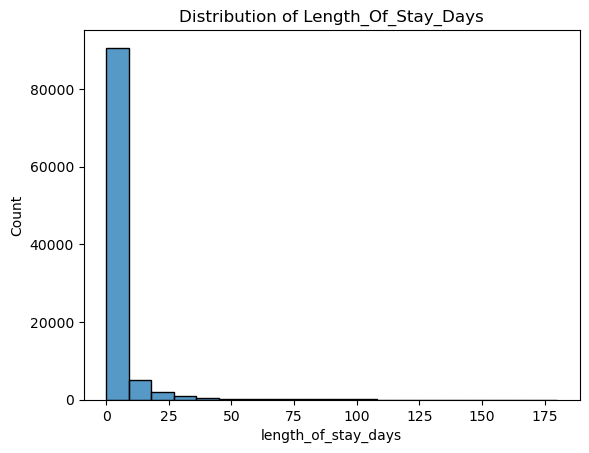

In [18]:
# Plot the distribution of 'Length_Of_Stay_Days'
sns.histplot(x='length_of_stay_days', data=ae, bins=20)
plt.title('Distribution of Length_Of_Stay_Days')
plt.show()

The peak at a certain value of stay length, indicates that this is a common duration for patients admitted.

**Data Visualization**-Bi Variate Analysis

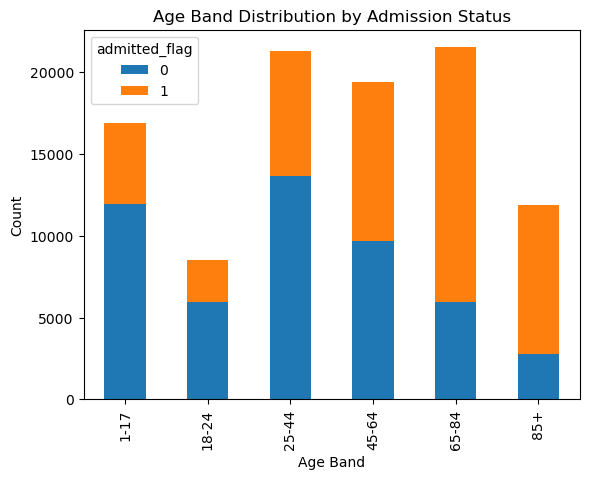

In [19]:
#Age Band Distribution by Admission Status

age_admission_count = ae.groupby(['age_band', 'admitted_flag']).size().unstack()
age_admission_count.plot(kind='bar', stacked=True)
plt.title('Age Band Distribution by Admission Status')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()


The stacked bar plot illustrates how the distribution of admission statuses (admitted and not admitted) varies across different age bands. Each bar is a representation of a specific age band, and the segments within the bar show the count of patients in each admission status category. By comparing the heights of the segments, you can observe the relative proportion of patients admitted and not admitted within each age band.

Age band 65-84 and 25-44  in the "admitted" segment is taller, it suggests that patients in those age bands are more likely to be admitted.



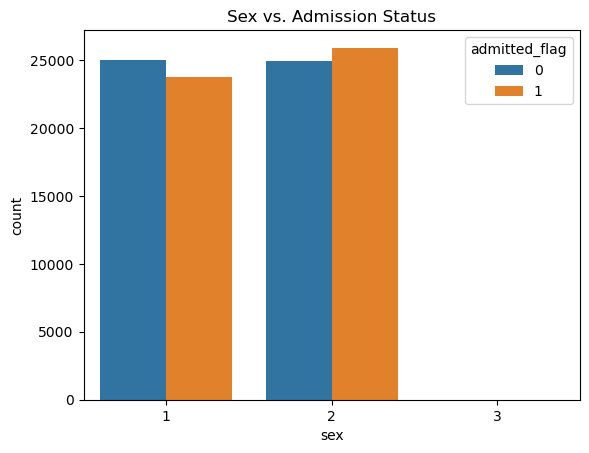

In [20]:
# Plot the relationship between 'Sex' and 'Admitted_Flag'
sns.countplot(x='sex', hue='admitted_flag', data=ae)
plt.title('Sex vs. Admission Status')
plt.show()

where 1 represents male

 and 2 represents female 
 
 and 3 represents unknown
 
The count plot visually displays the distribution of admission statuses (admitted and not admitted) for each gender category. By comparing the heights of the segments within each set of bars, you can observe how the count of patients differs between admission statuses for both males and females. The visuals above deduces from the data that females are more likely to be admitted than males. 

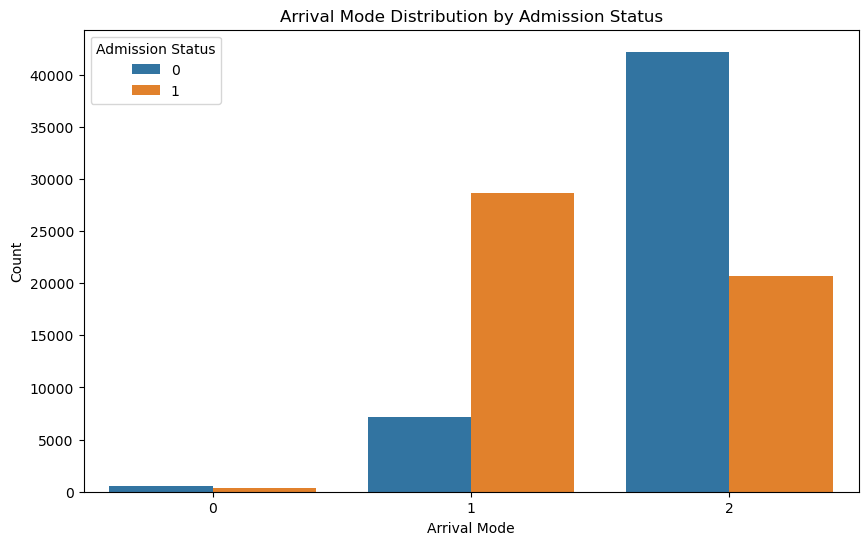

In [21]:
# count plot of arrival mode by admission status
plt.figure(figsize=(10, 6))
sns.countplot(data=ae, x='ae_arrival_mode', hue='admitted_flag')
plt.title('Arrival Mode Distribution by Admission Status')
plt.xlabel('Arrival Mode')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.show()


Where 0 - unknown 

1 - represents brought by ambulance 

2 - represents other means

The data shows that a&e patients arriving the hospital by ambulance tend to be admitted compared to patients/persons comming via other means.

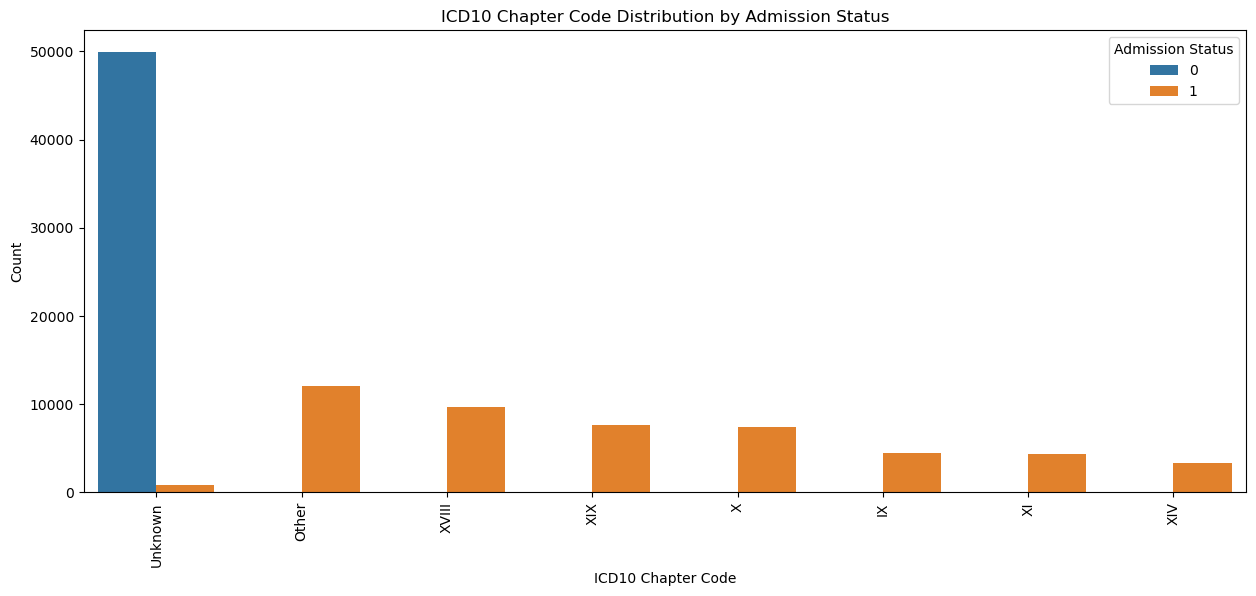

In [22]:
#ICD10 Chapter Code Distribution by Admission Status

plt.figure(figsize=(15, 6))
sns.countplot(data=ae, x='icd10_chapter_code', hue='admitted_flag', order=ae['icd10_chapter_code'].value_counts().index)
plt.title('ICD10 Chapter Code Distribution by Admission Status')
plt.xlabel('ICD10 Chapter Code')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.xticks(rotation=90)
plt.show()


This visualization helps in understanding how the distribution of patients based on ICD10 chapter codes differs between admission statuses. It can help in identifying patterns and differences in diagnoses among admitted and not admitted patient

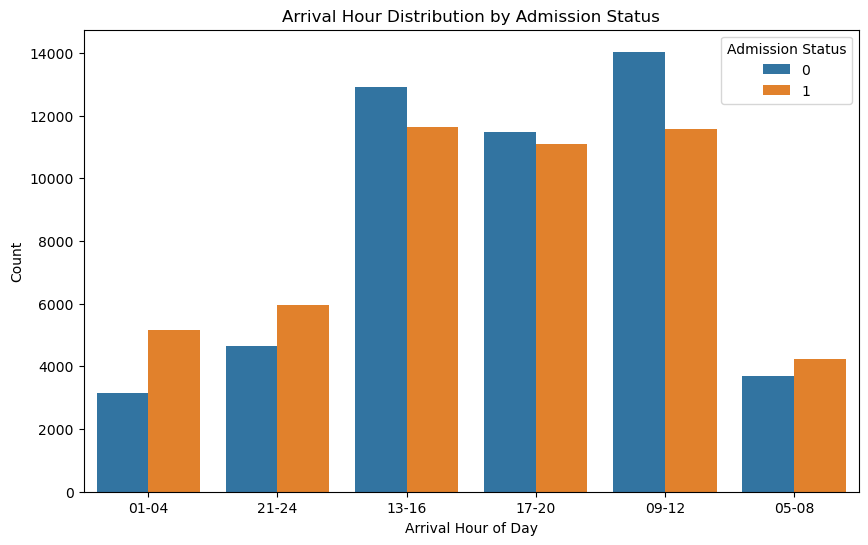

In [23]:
#Arrival Hour Distribution by Admission Status

plt.figure(figsize=(10, 6))
sns.countplot(data=ae, x='ae_arrive_hourofday', hue='admitted_flag')
plt.title('Arrival Hour Distribution by Admission Status')
plt.xlabel('Arrival Hour of Day')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.show()


This visualization helps in understanding how patient arrivals vary by hour of the day and how that variation relates to admission decisions. This plot shows that patients arrive more between 09am-12pm and 13pm-16pm
It can reveals that patients are more likely to be admitted between 09am-12pm and 13pm-16pm.

**MULTI-VARIATE ANALYSIS**

In [24]:
#Pair Plot of Features by Admission Status

# sns.pairplot(ae, hue='admitted_flag', diag_kind='kde')
# plt.suptitle('Pair Plot of Features by Admission Status', y=1.02)
# plt.show()

In the pair plot, each scatterplot shows how two features are related to each other, while considering the differentiation between admitted and not admitted patients through color. The pair plot helps in identifying patterns, trends, and potential relationships between pairs of features. It can provide insights into whether certain feature pairs are related differently depending on the admission status.

/tmp/ipykernel_20/2365984128.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ae, x='age_band', y='length_of_stay_days', hue='admitted_flag', ci=None)


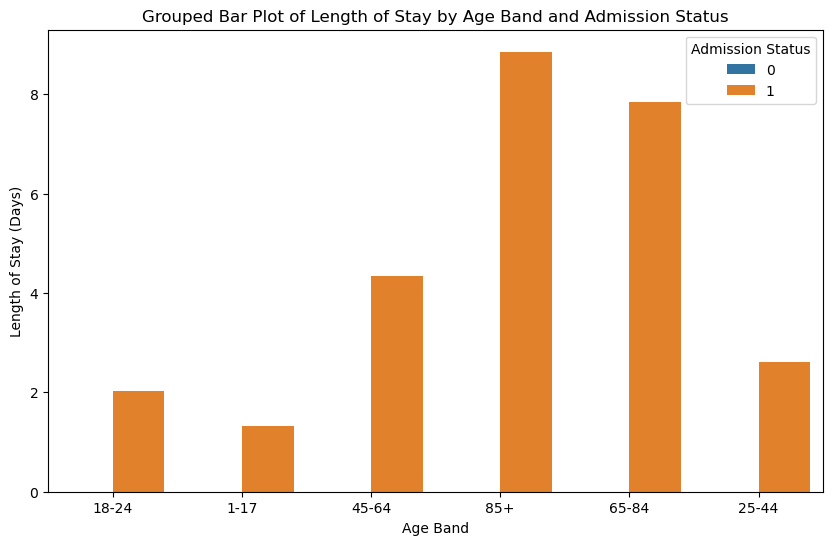

In [25]:
# bar plot of 'age_band' against 'length_of_stay_days'

plt.figure(figsize=(10, 6))
sns.barplot(data=ae, x='age_band', y='length_of_stay_days', hue='admitted_flag', ci=None)
plt.title('Grouped Bar Plot of Length of Stay by Age Band and Admission Status')
plt.xlabel('Age Band')
plt.ylabel('Length of Stay (Days)')
plt.legend(title='Admission Status')
plt.show()

The grouped bar plot visually displays how the average length of stay varies across age bands, with a differentiation between admission statuses. By comparing the heights of the bars within each 'Age Band', you can observe how the average length of stay differs between admission statuses for different age groups.
It can reveal in terms of age groups that 85+ and 65-84 tend to have longer stays when admitted while age group 1-17 tend to have to have shorter stays. 

**Checking The Correlation**

Next we check the correlation between each variable 

In [26]:
pd.options.display.float_format ='{:,.4f}'.format
corr_matrix = ae.corr()
corr_matrix

/tmp/ipykernel_20/3055969393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ae.corr()


,imd_decile_from_lsoa,sex,ae_time_mins,ae_num_diagnoses,ae_num_investigations,ae_num_treatments,ae_arrival_mode,provider_patient_distance_miles,provid,admitted_flag,length_of_stay_days,record_id
imd_decile_from_lsoa,1.0000,-0.0010,0.0016,0.0127,0.0009,0.0311,-0.0064,0.0933,-0.0080,0.0128,0.0115,0.0008
sex,-0.0010,1.0000,0.0232,-0.0010,0.0256,0.0045,-0.0112,-0.0007,-0.0060,0.0226,0.0104,0.0006
ae_time_mins,0.0016,0.0232,1.0000,0.0106,0.3365,0.1426,-0.3242,-0.0190,-0.1068,0.4147,0.1505,-0.0010
ae_num_diagnoses,0.0127,-0.0010,0.0106,1.0000,0.1226,0.1462,-0.0543,0.0049,-0.0307,0.0540,0.0220,0.0030
ae_num_investigations,0.0009,0.0256,0.3365,0.1226,1.0000,0.4631,-0.2642,-0.0197,-0.1217,0.4484,0.1540,-0.0043
ae_num_treatments,0.0311,0.0045,0.1426,0.1462,0.4631,1.0000,-0.1312,-0.0065,-0.0959,0.2552,0.0878,-0.0015
ae_arrival_mode,-0.0064,-0.0112,-0.3242,-0.0543,-0.2642,-0.1312,1.0000,0.0100,0.1068,-0.4223,-0.2161,0.0055
provider_patient_distance_miles,0.0933,-0.0007,-0.0190,0.0049,-0.0197,-0.0065,0.0100,1.0000,0.0262,-0.0236,-0.0035,-0.0011
provid,-0.0080,-0.0060,-0.1068,-0.0307,-0.1217,-0.0959,0.1068,0.0262,1.0000,-0.1246,-0.0465,0.0026
admitted_flag,0.0128,0.0226,0.4147,0.0540,0.4484,0.2552,-0.4223,-0.0236,-0.1246,1.0000,0.3386,-0.0038


In [27]:
corr_matrix['admitted_flag'].sort_values(ascending=False)

admitted_flag                      1.0000
ae_num_investigations              0.4484
ae_time_mins                       0.4147
length_of_stay_days                0.3386
ae_num_treatments                  0.2552
ae_num_diagnoses                   0.0540
sex                                0.0226
imd_decile_from_lsoa               0.0128
record_id                         -0.0038
provider_patient_distance_miles   -0.0236
provid                            -0.1246
ae_arrival_mode                   -0.4223
Name: admitted_flag, dtype: float64

The correlation ranges from -1 to +1 when it is close to +1 this signifies that there is a string positive correlation, so we can see there is a stong positive correlation between admitted_flag

/tmp/ipykernel_20/2314937749.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ae.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

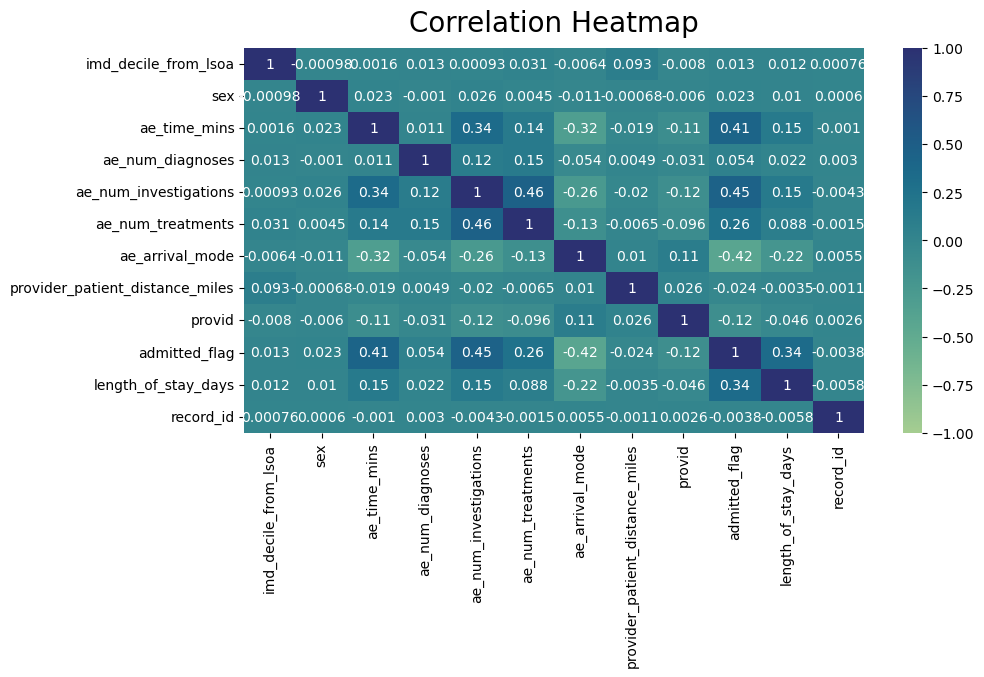

In [28]:
#Check correlation heatmap for all values
plt.figure(figsize = (10,5))
corr = ae.corr()
sns.heatmap(corr,  vmin = -1, vmax = 1, annot = True, cmap = "crest").set_title("Correlation Heatmap", fontdict = {"fontsize":20}, pad = 12)

**DATA PREPOCESSING**

Encoding Categorical Variables

In [29]:

# convert numerical categorical columns by one-hot encoding

# Create a new DataFrame to store one-hot encoded columns
columns_to_exclude = ["ae_arrive_date", "ae_time_mins", "provid", "record_id", "treatment_function_code"]
ae2 = ae.drop(columns=columns_to_exclude)

# Select the columns for one-hot encoding
columns_to_encode = ["age_band","imd_decile_from_lsoa", "sex", "ae_arrival_mode", 'ae_hrg', 'icd10_chapter_code', "ae_arrive_hourofday"]

# Convert numerical categorical columns to strings
for col in columns_to_encode:
    ae2[col] = ae2[col].astype(str)

# Perform one-hot encoding using pandas get_dummies
one_hot_encoded = pd.get_dummies(ae2[columns_to_encode], prefix=columns_to_encode)

# Concatenate the one-hot encoded columns with the new DataFrame
ae2 = pd.concat([ae2, one_hot_encoded], axis=1)

# Drop the original encoded columns
ae2.drop(columns=["age_band","imd_decile_from_lsoa", "sex", "ae_arrival_mode", 'ae_hrg', 'icd10_chapter_code', "ae_arrive_hourofday"], inplace=True)

# Print the transformed DataFrame
(ae2.head(10))

,ae_num_diagnoses,ae_num_investigations,ae_num_treatments,provider_patient_distance_miles,admitted_flag,length_of_stay_days,age_band_1-17,age_band_18-24,age_band_25-44,age_band_45-64,...,icd10_chapter_code_XI,icd10_chapter_code_XIV,icd10_chapter_code_XIX,icd10_chapter_code_XVIII,ae_arrive_hourofday_01-04,ae_arrive_hourofday_05-08,ae_arrive_hourofday_09-12,ae_arrive_hourofday_13-16,ae_arrive_hourofday_17-20,ae_arrive_hourofday_21-24
0,2,2,1,8,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,4,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,2,1,1,42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,2,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,7,2,8,1,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1,10,10,16,1,23,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,1,1,2,24,1,7,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1,8,3,0,1,3,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
9,2,2,3,6,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler

# numerical columns to scale
columns_to_scale = ['ae_num_diagnoses','ae_num_investigations', 'ae_num_treatments','provider_patient_distance_miles','length_of_stay_days']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
ae2_scaled = ae2.copy()  # Make a copy of your encoded DataFrame
ae2_scaled[columns_to_scale] = scaler.fit_transform(ae2_scaled[columns_to_scale])

# Now ae_scaled contains your standardized features
print(ae2_scaled.head())


   ae_num_diagnoses  ae_num_investigations  ae_num_treatments  \
0            1.6247                -0.5039            -0.8073   
1            0.1941                -0.8296            -0.8073   
2            0.1941                -0.8296             0.5611   
3            0.1941                -0.8296            -0.3512   
4            0.1941                -0.5039            -0.3512   

   provider_patient_distance_miles  admitted_flag  length_of_stay_days  \
0                           0.0552              0              -0.3377   
1                          -0.3632              0              -0.3377   
2                          -0.3632              0              -0.3377   
3                          -0.3632              1               4.7539   
4                          -0.3034              0              -0.3377   

   age_band_1-17  age_band_18-24  age_band_25-44  age_band_45-64  ...  \
0              0               1               0               0  ...   
1              1  

**Applying Machine Learning Models**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.model_selection import train_test_split

# Step 1: Train-Test SplitING THE DATA
X = ae2_scaled.drop(columns=["admitted_flag"])  # Features
y = ae2_scaled["admitted_flag"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(69679, 45) (69679,)


In [33]:
X.head()

,ae_num_diagnoses,ae_num_investigations,ae_num_treatments,provider_patient_distance_miles,length_of_stay_days,age_band_1-17,age_band_18-24,age_band_25-44,age_band_45-64,age_band_65-84,...,icd10_chapter_code_XI,icd10_chapter_code_XIV,icd10_chapter_code_XIX,icd10_chapter_code_XVIII,ae_arrive_hourofday_01-04,ae_arrive_hourofday_05-08,ae_arrive_hourofday_09-12,ae_arrive_hourofday_13-16,ae_arrive_hourofday_17-20,ae_arrive_hourofday_21-24
0,1.6247,-0.5039,-0.8073,0.0552,-0.3377,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.1941,-0.8296,-0.8073,-0.3632,-0.3377,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.1941,-0.8296,0.5611,-0.3632,-0.3377,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.1941,-0.8296,-0.3512,-0.3632,4.7539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.1941,-0.5039,-0.3512,-0.3034,-0.3377,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.linear_model import LogisticRegression

#Apply print Logistic regression model
lrclassifier = LogisticRegression(random_state=42)
lrclassifier.fit(X_train, y_train)
lrprediction = lrclassifier.predict(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#PRINT ACCURACY FOR LOGISTIC
print('Accuracy of Logistic Rergression:', accuracy_score(lrprediction,y_test))

Accuracy of Logistic Rergression: 0.9959146770250812


In [36]:
#Classification for Logistic regression
print( classification_report(y_test, lrprediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14922
           1       1.00      0.99      1.00     14941

    accuracy                           1.00     29863
   macro avg       1.00      1.00      1.00     29863
weighted avg       1.00      1.00      1.00     29863



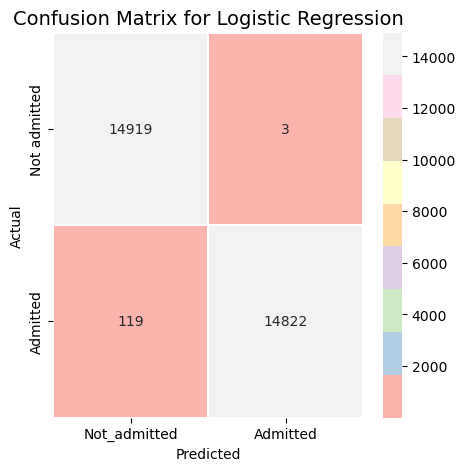

In [37]:
# confusion matrix to identify false psitives and false negatives
cflr = pd.crosstab(y_test.values, lrprediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax2) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cflr, fmt = "d",
            xticklabels=['Not_admitted', 'Admitted'],
            yticklabels=['Not admitted', 'Admitted'],
            annot=True,ax=ax2,
            linewidths=.2,linecolor="White", cmap="Pastel1")
plt.title('Confusion Matrix for Logistic Regression', fontsize=14)
plt.show()

In [38]:
#print ROC curve score for LR
rocaucscorelr=roc_auc_score(y_test.values, lrprediction)
print('Roc Score: ',rocaucscorelr)

Roc Score:  0.995917146781899


In [39]:
#print prediction for Decision tree
dtclassifier = DecisionTreeClassifier(random_state = 1, criterion="gini",)
dtclassifier.fit(X_train, y_train)
dtprediction = dtclassifier.predict(X_test)
print('Accuracy of Decision Tree:', accuracy_score(dtprediction,y_test))

Accuracy of Decision Tree: 0.9941064193148712


In [40]:
#Classification for Decision tree
print( classification_report(y_test, dtprediction) )

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14922
           1       0.99      1.00      0.99     14941

    accuracy                           0.99     29863
   macro avg       0.99      0.99      0.99     29863
weighted avg       0.99      0.99      0.99     29863



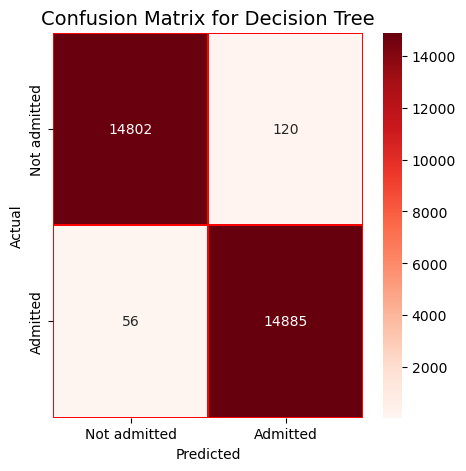

In [41]:
#Print Confusuion Matrix for decision trees
cfdt = pd.crosstab(y_test.values, dtprediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax2) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cfdt, fmt = "d",
            xticklabels=['Not admitted', 'Admitted'],
            yticklabels=['Not admitted', 'Admitted'],
            annot=True,ax=ax2,
            linewidths=.2,linecolor="Red", cmap="Reds")
plt.title('Confusion Matrix for Decision Tree', fontsize=14)
plt.show()

In [42]:
#print ROC curve score
rocaucscoredt=roc_auc_score(y_test.values, dtprediction)
print('Roc Score: ',rocaucscoredt)

Roc Score:  0.9941050533922908


In [43]:
# Importing KNN
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# fitting the knn model
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)
print(knn.score(X_test,y_test))

[1 1 1 ... 0 0 0]
0.9592472290124904


In [45]:
# print accuracy of knn
print('Accuracy of KNN:', accuracy_score(knn_pred,y_test))

Accuracy of KNN: 0.9592472290124904


In [46]:
#Classification report for knn
print( classification_report(y_test, knn_pred) )

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14922
           1       0.99      0.92      0.96     14941

    accuracy                           0.96     29863
   macro avg       0.96      0.96      0.96     29863
weighted avg       0.96      0.96      0.96     29863



In [47]:
# print confussion matrix for knn
print(confusion_matrix(y_test.values, knn_pred))

[[14835    87]
 [ 1130 13811]]


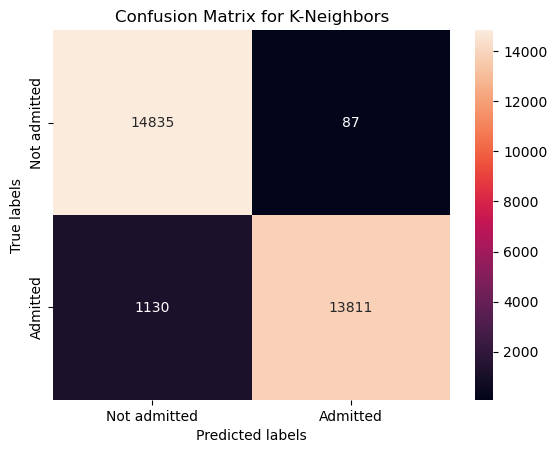

In [48]:
# visualize confusion matrix for knn
cmknn = confusion_matrix(y_test, knn_pred)
ax= plt.subplot()
sns.heatmap(cmknn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for K-Neighbors'); 
ax.xaxis.set_ticklabels(['Not admitted', 'Admitted']); ax.yaxis.set_ticklabels(['Not admitted', 'Admitted'])
plt.show()

In [49]:
#print ROC curve score for KNN
rocaucscoreknn=roc_auc_score(y_test.values, knn_pred)
print('Roc Score: ',rocaucscoreknn)

Roc Score:  0.9592694339055156


In [50]:
# Attempting to use Support Vector Machine
from sklearn.svm import SVC
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14922
           1       1.00      0.99      1.00     14941

    accuracy                           1.00     29863
   macro avg       1.00      1.00      1.00     29863
weighted avg       1.00      1.00      1.00     29863



In [51]:
# Printing accuracy of svm
print('Accuracy of SVM:', accuracy_score(predictions,y_test))

Accuracy of SVM: 0.9952784382011184


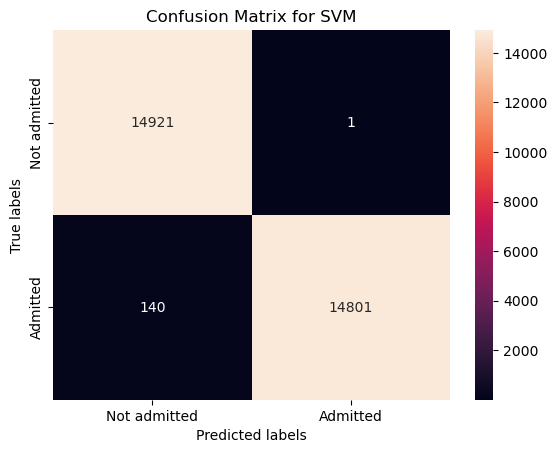

In [52]:
# visualize confusion matrix for knn
cmsvm = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cmsvm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['Not admitted', 'Admitted']); ax.yaxis.set_ticklabels(['Not admitted', 'Admitted'])
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print('Accuracy of rf:', accuracy_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# visualize confusion matrix for random forrest
cmrf = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cmrf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RF'); 
ax.xaxis.set_ticklabels(['Not admitted', 'Admitted']); ax.yaxis.set_ticklabels(['Not admitted', 'Admitted'])
plt.show()


**Test dataset processing and prediction**

The test data set provided without the admitted flag is processed

In [ ]:
ae3 = pd.read_csv('/kaggle/input/bip-ae-technical-challenge/test_set.csv')

In [ ]:
ae3.isnull().values.any()

#checking missing values in test dataset columnwise
ae3.isna().sum()

In [ ]:
# viewing the first 5 data points of the test data set
ae3.head()

In [ ]:
#Getting the shape of test data
ae3.shape

In [ ]:
# Convert all column names to lowercase
ae3.columns = ae3.columns.str.lower()
print(ae3.columns)

In [ ]:
mode = ae3['imd_decile_from_lsoa'].mode()
median = ae3['imd_decile_from_lsoa'].median()
print(mode)
print(median)

print(ae3['ae_arrive_hourofday'].mode())
print(ae3['ae_hrg'].mode())
print(ae3['sex'].mode())

In [ ]:
#Dealing with the null values in test dataset
ae3['sex'].fillna(3.0000, inplace=True) #3.0000 stands for unknown gender
ae3['icd10_chapter_code'].fillna('Unknown', inplace=True)
ae3['length_of_stay_days'].fillna(0, inplace=True)
ae3['treatment_function_code'].fillna("Unknown", inplace=True)
ae3['imd_decile_from_lsoa'].fillna(1.0000, inplace=True)
ae3['ae_arrive_hourofday'].fillna("09-12", inplace = True)
ae3['ae_hrg'].fillna("Low", inplace=True)
print("Shape of cleaned DataFrame:", ae3.shape)

In [ ]:
#Fill in provider_patient_distance_miles missing values in test data set using mean
ae3['provider_patient_distance_miles'].fillna(ae3['provider_patient_distance_miles'].mean(), inplace=True)

In [ ]:
 # calculating the sum of null values across all the columns in test dataset
(ae3.isnull().sum())

In [ ]:
# Viewing the first 5 data points of the test data set
ae3.head()

In [ ]:
# Convert 'Provider_Patient_Distance_Miles', 'length_of_stay_days', 'imd_decile_from_lsoa' columns to integers in test data set
ae3['sex'] = ae3['sex'].astype(int)
ae3['length_of_stay_days'] = ae3['length_of_stay_days'].astype(int)
ae3['provider_patient_distance_miles'] = ae3['provider_patient_distance_miles'].astype(int)
ae3['imd_decile_from_lsoa'] = ae3['imd_decile_from_lsoa'].astype(int)


In [ ]:
# Calculate the count of each age band on-the-fly using value_counts()
age_band_counts = ae3['age_band'].value_counts()

# Plotting the age band distribution as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(age_band_counts.index, age_band_counts)
plt.xlabel('Age Band (Grouped as Integers)')
plt.ylabel('Count')
plt.title('Distribution of Age Bands for Test Data Set')
plt.xticks(rotation=0)  # If age bands are represented by integer labels, no need to rotate x-axis labels

plt.show()

From the chart for the test data set, it can be deduced that the 65-84 and 25-44 age bands are the most populous and the ageband distribution in the test dataset is consistent with the training data set

In [ ]:
#checking gender distribution
#first check the overall distribution of age then gender

plt.figure(figsize=(18,12))
plt.subplot(221)
ae3["sex"].value_counts().plot.pie(x=1, autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female", "Unknown"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1,.1],shadow =True)

plt.title("Distribution of Gender for Test Data Set")
plt.show()


The chart above shows 51% of the overall dataset are male and the other 48% are females for the test data set with an estimated 1% being unknown showing consistency with the training data set

In [ ]:
# TEST DATA SET
# convert numerical categorical columns by one-hot encoding

# Create a new DataFrame to store one-hot encoded columns
columns_to_exclude = ["ae_arrive_date", "ae_time_mins", "provid", "record_id", "treatment_function_code"]
ae4 = ae3.drop(columns=columns_to_exclude)

# Select the columns for one-hot encoding
columns_to_encode = ["age_band","imd_decile_from_lsoa", "sex", "ae_arrival_mode", 'ae_hrg', 'icd10_chapter_code', "ae_arrive_hourofday"]

# Convert numerical categorical columns to strings
for col in columns_to_encode:
    ae4[col] = ae4[col].astype(str)

# Perform one-hot encoding using pandas get_dummies
one_hot_encoded = pd.get_dummies(ae4[columns_to_encode], prefix=columns_to_encode)

# Concatenate the one-hot encoded columns with the new DataFrame
ae4 = pd.concat([ae4, one_hot_encoded], axis=1)

# Drop the original encoded columns
ae4.drop(columns=["age_band","imd_decile_from_lsoa", "sex", "ae_arrival_mode", 'ae_hrg', 'icd10_chapter_code', "ae_arrive_hourofday"], inplace=True)

# Print the transformed DataFrame
(ae4.head(10))

In [ ]:
# Fit the scaler on the selected columns and transform them FOR TEST DATA SET
ae4_scaled = ae4.copy()  # Make a copy of your encoded DataFrame
ae4_scaled[columns_to_scale] = scaler.fit_transform(ae4_scaled[columns_to_scale])

# Now ae_scaled contains your standardized features
print(ae4_scaled.head())

In [ ]:
X_final = ae4_scaled
X_final.head()

In [ ]:
# Prediction with logistic regression using final test data set
lrpred_final = lrclassifier.predict(X_final)
print(lrpred_final)

In [ ]:
#  Converting lrpred_final from Np to DF
predictions_col_lr = pd.DataFrame()
predictions_col_lr['Admission flag'] = lrpred_final.tolist()


# adding predictions to test data
# df_out = pd.merge(df_data, predictions_col, left_index = True, right_index = True)
# df_out
df_out_lr = pd.merge(X_final, predictions_col_lr, left_index = True, right_index = True)

# Make the record id into a dataframe
record_f = pd.DataFrame()
record_f["record id"] = ae3["record_id"].tolist()

# Merge the record id into the existing dataframe
lr_prediction_file = pd.merge(df_out_lr, record_f, left_index = True, right_index = True)

# Subset the skinny dataframe
ae_lr_skinny = lr_prediction_file.loc[:, ["record id", "Admission flag"]]
print(ae_lr_skinny)

In [ ]:
# Prediction with Decision tree using final test data set
dtpred_final = dtclassifier.predict(X_final)
print(dtpred_final)

In [ ]:
#  Converting dtpred_final from Np to DF
predictions_col_dt = pd.DataFrame()
predictions_col_dt['Admission flag'] = dtpred_final.tolist()


# adding predictions to test data
# df_out = pd.merge(df_data, predictions_col, left_index = True, right_index = True)
# df_out
df_out_dt = pd.merge(X_final, predictions_col_dt, left_index = True, right_index = True)

# Make the record id into a dataframe
record_f = pd.DataFrame()
record_f["record id"] = ae3["record_id"].tolist()

# Merge the record id into the existing dataframe
dt_prediction_file = pd.merge(df_out_dt, record_f, left_index = True, right_index = True)

# Subset the skinny dataframe
ae_dt_skinny = dt_prediction_file.loc[:, ["record id", "Admission flag"]]
print(ae_dt_skinny)

In [ ]:
# Prediction with KNN using final test data set
knnpred_final = knn.predict(X_final)
print(knnpred_final)

In [ ]:
#  Converting knnpred_final from Np to DF
predictions_col = pd.DataFrame()
predictions_col['Admission flag'] = knnpred_final.tolist()


# adding predictions to test data
# df_out = pd.merge(df_data, predictions_col, left_index = True, right_index = True)
# df_out
df_out_knn = pd.merge(X_final, predictions_col, left_index = True, right_index = True)

# Make the record id into a dataframe
record_f = pd.DataFrame()
record_f["record id"] = ae3["record_id"].tolist()

# Merge the record id into the existing dataframe
knn_prediction_file = pd.merge(df_out_knn, record_f, left_index = True, right_index = True)

# Subset the skinny dataframe
ae_knn_skinny = knn_prediction_file.loc[:, ["record id", "Admission flag"]]
print(ae_knn_skinny)

In [ ]:
# Prediction with KNN using final test data set
rf_pred_final = rf.predict(X_final)
print(rf_pred_final)

In [ ]:
#  Converting random forrest rf_pred_final from Np to DF
predictions_col_rf = pd.DataFrame()
predictions_col_rf['Admitted_flag'] = rf_pred_final.tolist()


# adding predictions to test data
# df_out = pd.merge(df_data, predictions_col, left_index = True, right_index = True)
# df_out
df_out_rf = pd.merge(X_final, predictions_col_rf, left_index = True, right_index = True)

# Make the record id into a dataframe
record_rf = pd.DataFrame()
record_rf["Record_ID"] = ae3["record_id"].tolist()

# Merge the record id into the existing dataframe
rf_prediction_file = pd.merge(df_out_rf, record_rf, left_index = True, right_index = True)

# Subset the skinny dataframe
ae_rf_skinny = rf_prediction_file.loc[:, ["Record_ID", "Admitted_flag"]]
print(ae_rf_skinny)

In [ ]:
# converting to csv
ae_rf_skinny.to_csv('Test dataset plus admission flag rf.csv', index=False)